In [4]:
# MNIST 1
import tensorflow

(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# 3D-Tenosr mit 60000 Samples, jeweilige Größe von 28x28 Pixel
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

import numpy as np
x_train = x_train.astype("float64") / 255
x_test = x_test.astype("float64") / 255

from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

## Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()

#Erste Konvolutionsschicht:
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))

#Zweite Konvolutionsschicht:
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Vollständig verbundene Schicht mit Dropout:
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

#Ausgabeschicht:
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model_history = model.fit(x_train, y_train, epochs=5, batch_size=1024)

Epoch 1/5
59/59 [==============================] - 73s 1s/step - loss: 0.6314 - accuracy: 0.8068
Epoch 2/5
59/59 [==============================] - 88s 1s/step - loss: 0.1534 - accuracy: 0.9539
Epoch 3/5
59/59 [==============================] - 93s 2s/step - loss: 0.0952 - accuracy: 0.9714
Epoch 4/5
59/59 [==============================] - 175s 3s/step - loss: 0.0698 - accuracy: 0.9785
Epoch 5/5
59/59 [==============================] - 172s 3s/step - loss: 0.0563 - accuracy: 0.9834


In [14]:
model.evaluate(x_test, y_test, verbose=0)

[0.03823268413543701, 0.9869999885559082]

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

tf.Tensor(
[[[ 0.06115406]
  [ 0.15007938]
  [ 0.08681795]]

 [[-0.08522804]
  [ 0.04897368]
  [ 0.02856426]]

 [[-0.16912265]
  [-0.12204701]
  [ 0.06109772]]], shape=(3, 3, 1), dtype=float32)


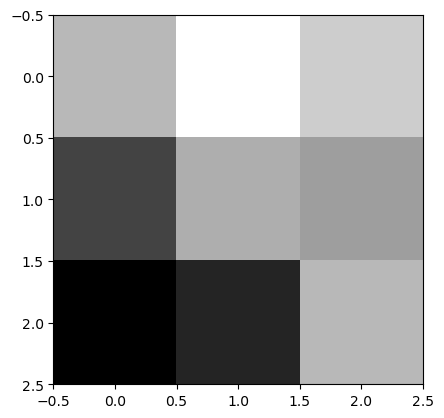

In [60]:
# Filter 1 Werte 
print(model.layers[0].weights[0][:,:,:,1])

# Filter 1 Picture
import tensorflow.keras.backend as K
data = K.eval(model.layers[0].weights[0])
import matplotlib.pyplot as plt
plt.imshow(data[:,:,:,1].reshape(3,3), cmap="gray")
plt.show()